<a href="https://colab.research.google.com/github/lrnrdr/Prediction-of-Product-Sales/blob/main/Project_3_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: (Prediction of Product Sales).
- Author: Loraine Rodriguez


# Project Overview

Project 1 - Part 2 (Core):

We will continue to work off of the GitHub repository you created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

- Download the data using this link: download the data. (Note: Original data source).
- Insert code below the heading "Loading Data"
Use Pandas to read the sales prediction data set into Google Colab.
Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
Explore the data - what do you need to do to clean this data? Clean it!
Be sure to address each of the following tasks:


1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

# Loading Data


In [30]:
import pandas as pd
# file path


In [31]:
df = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
# load in the data
df_sales = pd.read_csv(df)

- Preview the first rows of your data using df.head()

In [32]:
# df.head()
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- Display a summary of your DataFrame's columns using df.info()

In [34]:
## df.info()

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning

## 1) How many rows and columns?

In [6]:
# Using df.shape to display how man rows and columns
df_sales.shape

(8523, 12)

## 2) What are the datatypes of each variable?

In [7]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## 3) Are there duplicates? If so, drop any duplicates.

In [8]:
## Display the sum of duplicate rows in the dataset
df_sales.duplicated().sum()

0

 - There are no duplicates

## 4) Identify missing values.

In [9]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

 - Answer: The Item_Weight and Outlet_Size are missing values.

## 5) Address the missing values by using a placeholder value.

In [10]:
df_sales['Outlet_Size']
df_sales['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
# Using fillna to fill Outlet_Size nulls with "MISSING"
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna("MISSING")
df_sales['Outlet_Size'].value_counts(dropna=False)

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [12]:
cat_cols = df_sales.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [13]:
# Using the list of cat_cols to fillna
df_sales[cat_cols] = df_sales[cat_cols].fillna("MISSING")

- Now I will work on addressing the numeric missing values.  The Item_Weight is missing values and it is numeric, which we saw earlier when we checked the dtype, so we have to replace it with a number.

In [14]:
# Saving list of column names for numeric cols
num_cols = df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
# Check numeric features for null values
df_sales[num_cols].isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

- Filling null values with -1 for Item_Weight

In [16]:
df_sales['Item_Weight']  = df_sales['Item_Weight'].fillna(-1)

## 6) Confirm that there are no missing values after addressing them.

In [17]:
# Confirm that all null values have been filled for categorical columns
df_sales[cat_cols].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

- The Outlet_Size has no more nulls/ missing values

In [18]:
# Check numeric features for null values
df_sales[num_cols].isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [19]:
df_sales['Item_Weight'].isna().sum()

0

- The Item_Weight has no more nulls/ missing values

## 7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [20]:
# Identify string columns
string_cols = df_sales.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [21]:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df_sales[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


- Item_Fat_Content has incosistancies that need to be fixed.
 - LF and low fat should be changed to Low Fat.
 - Reg should be changed to Regular


In [22]:
# changing LF and low fat to Low Fat
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':"Low Fat",'low fat':'Low Fat'})
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [23]:
# changing reg to Regular
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'reg':"Regular"})

- Confirm value counts are no longer inconsistant

In [24]:
# confirm value counts are no longer inconsistant
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [27]:
numerical_columns = df_sales.select_dtypes(include=['int64', 'float64'])
summary_stats = numerical_columns.describe()
print(summary_stats)

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     10.478936         0.066132   140.992782                1997.831867   
std       6.720742         0.051598    62.275067                   8.371760   
min      -1.000000         0.000000    31.290000                1985.000000   
25%       6.650000         0.026989    93.826500                1987.000000   
50%      11.000000         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


## Exploratory Data Analysis
Project 1 - Part 3 (Core):

For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

- Histograms to view the distributions of numerical features in your dataset.
- Boxplots to view statistical summaries of numerical features in your dataset.
- Countplots to view the frequency of each class of categorial features in your dataset.
- Heatmap to view the correlation between features.

In [41]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [42]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- Histograms to view the distributions of numerical features in your dataset.

In [43]:
# Take a look at Item_Outlet_Sales column
df_sales["Item_Outlet_Sales"].head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

<Axes: >

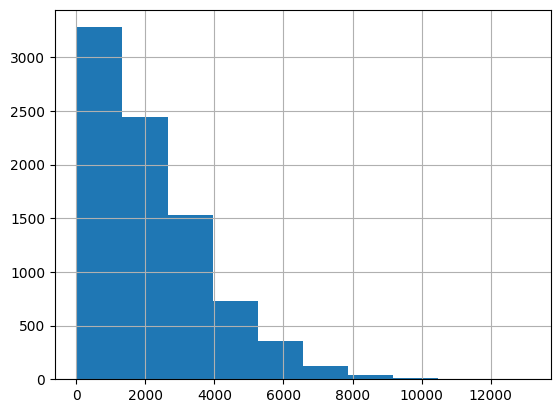

In [44]:
# Make a default histogram of the Item_Outlet_Sales column
df_sales['Item_Outlet_Sales'].hist()

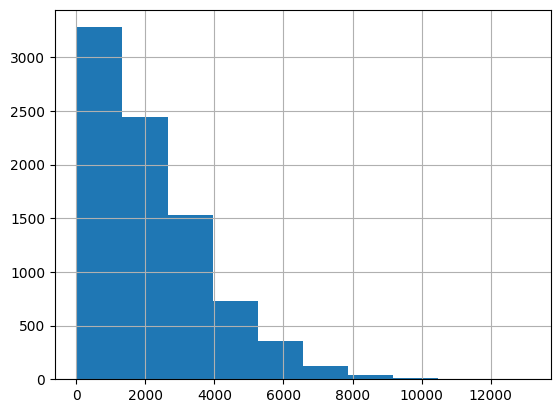

In [45]:
# saving the ax from .hist()
ax = df_sales['Item_Outlet_Sales'].hist()

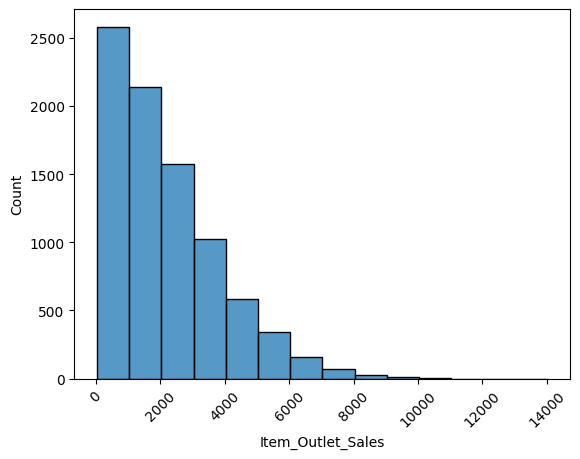

In [46]:
ax = sns.histplot(data=df_sales, x='Item_Outlet_Sales', binwidth=1_000)
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);

- Boxplots to view statistical summaries of numerical features in your dataset.

In [53]:
# obtains summary stats for Item_Weight
df_sales['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

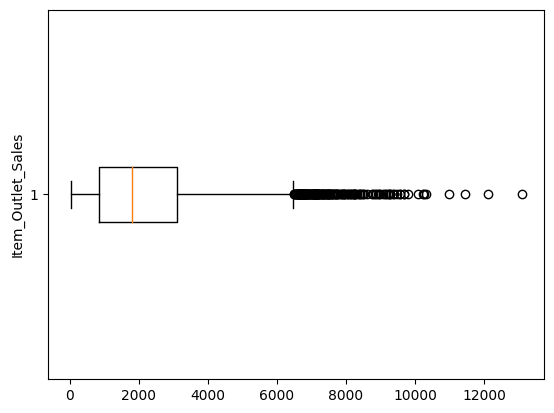

In [57]:
# create boxplot for the entire dataset
fig, ax = plt.subplots()
data = df_sales["Item_Outlet_Sales"]
ax.boxplot(data, vert = False);
ax.set_ylabel("Item_Outlet_Sales");

- Countplots to view the frequency of each class of categorial features in your dataset.

In [60]:
# Using select dtypes to get names of categorical columns
cat_cols = df_sales.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [58]:
# Checking the nunique in cat_cols
df_sales[cat_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [67]:
# Saving the value counts
val_counts = df_sales['Item_Type'].value_counts(normalize=True) * 100
val_counts

Fruits and Vegetables    14.455004
Snack Foods              14.079549
Household                10.676992
Frozen Foods             10.043412
Dairy                     8.001877
Canned                    7.614690
Baking Goods              7.602957
Health and Hygiene        6.101138
Soft Drinks               5.221166
Meat                      4.986507
Breads                    2.944972
Hard Drinks               2.510853
Others                    1.982870
Starchy Foods             1.736478
Breakfast                 1.290625
Seafood                   0.750909
Name: Item_Type, dtype: float64

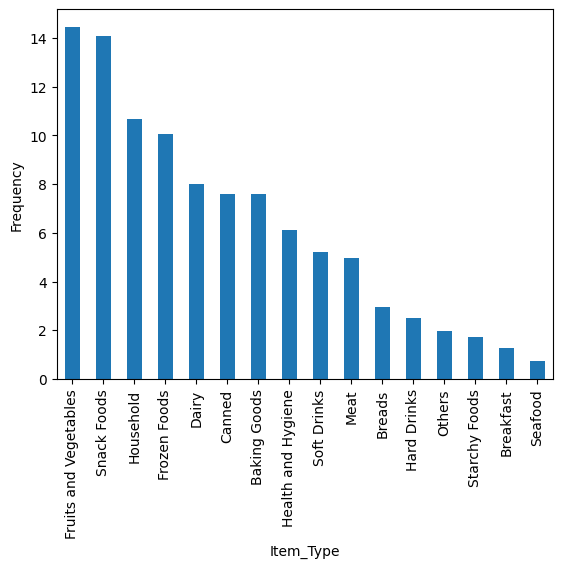

In [69]:
# Plot of frequency of Item_Type
ax = val_counts.plot(kind='bar')
ax.set_ylabel("Frequency");
ax.set_xlabel("Item_Type");

- Heatmap to view the correlation between features.

<ipython-input-71-c333beb18e72>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_sales.corr(),annot=True,cmap='Blues');


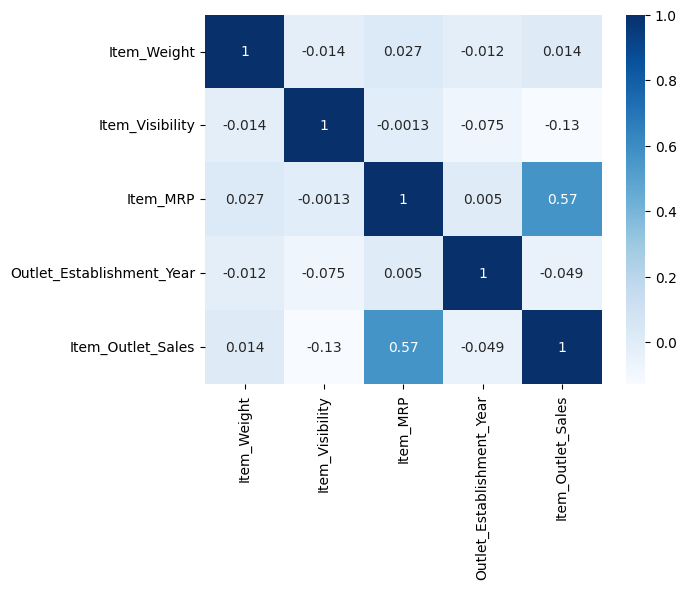

In [71]:
# # Make a heatmap of correlations
sns.heatmap(df_sales.corr(),annot=True,cmap='Blues');

## Feature Inspection